In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import lu_factor, lu_solve


In [3]:
n = 5 # Grado del polinomio approssimante

x = np.array([1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3])
y = np.array([1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.5])

print('Shape of x:', x.shape)
print('Shape of y:', y.shape, "\n")

N = x.size # Numero dei dati

A = np.zeros((N, n+1))

for i in range(n+1):
  A[:, i]= x**i

print("A = \n", A)

Shape of x: (11,)
Shape of y: (11,) 

A = 
 [[  1.        1.        1.        1.        1.        1.     ]
 [  1.        1.2       1.44      1.728     2.0736    2.48832]
 [  1.        1.4       1.96      2.744     3.8416    5.37824]
 [  1.        1.6       2.56      4.096     6.5536   10.48576]
 [  1.        1.8       3.24      5.832    10.4976   18.89568]
 [  1.        2.        4.        8.       16.       32.     ]
 [  1.        2.2       4.84     10.648    23.4256   51.53632]
 [  1.        2.4       5.76     13.824    33.1776   79.62624]
 [  1.        2.6       6.76     17.576    45.6976  118.81376]
 [  1.        2.8       7.84     21.952    61.4656  172.10368]
 [  1.        3.        9.       27.       81.      243.     ]]


In [12]:
''' Risoluzione tramite equazioni normali'''

# calcoliamo la matrice del sistema e il termine noto a parte
ATA = np.dot(A.T, A) 
ATy = np.dot(A.T, y)

lu, piv = lu_factor(ATA)

alpha_normali = lu_solve((lu, piv), ATy)

print("alpha_normali = \n", alpha_normali) #coeff. polinomio approssimante


alpha_normali = 
 [  8.43398589 -22.03171875  25.44762489 -13.98346424   3.70592943
  -0.38060897]


In [7]:
'''Risoluzione tramite SVD'''

# help(scipy.linalg.svd)

U, s, Vh = scipy.linalg.svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

alpha_svd = np.zeros(s.shape)

for i in range(n+1): 
	ui = U[:,i] #colonne della matrice U
	vi = Vh[i,:] #righe della matrice Vh
	alpha_svd = alpha_svd + (ui @ y) * vi/ s[i]
print(alpha_svd)

Shape of U: (11, 11)
Shape of s: (6,)
Shape of V: (6, 6)
[  8.43398601 -22.03171911  25.44762529 -13.98346445   3.70592949
  -0.38060897]


In [15]:
'''Verifica e confronto delle soluzioni'''

# Funzione per valutare il polinomio p, in un punto x, dati i coefficienti alpha
def p(alpha, x):
  N = len(x) #Numero dei dati passati come argomento
  n = len(alpha) #5 + 1 (poichè ^0 incluso)
  A = np.zeros((N,n))
  for i in range(n):
    A[:, i] = x ** i
  return A @ alpha 


'''CONFRONTO ERRORI SUI DATI '''
y1 =  p(alpha_normali, x)
y2 = p(alpha_svd, x)

err1 = np.linalg.norm (y-y1, 2) 
err2 = np.linalg.norm (y-y2, 2) 
print ('Errore di approssimazione con Eq. Normali: ', err1)
print ('Errore di approssimazione con SVD: ', err2)

Errore di approssimazione con Eq. Normali:  0.09256762160045008
Errore di approssimazione con SVD:  0.09256762160044393


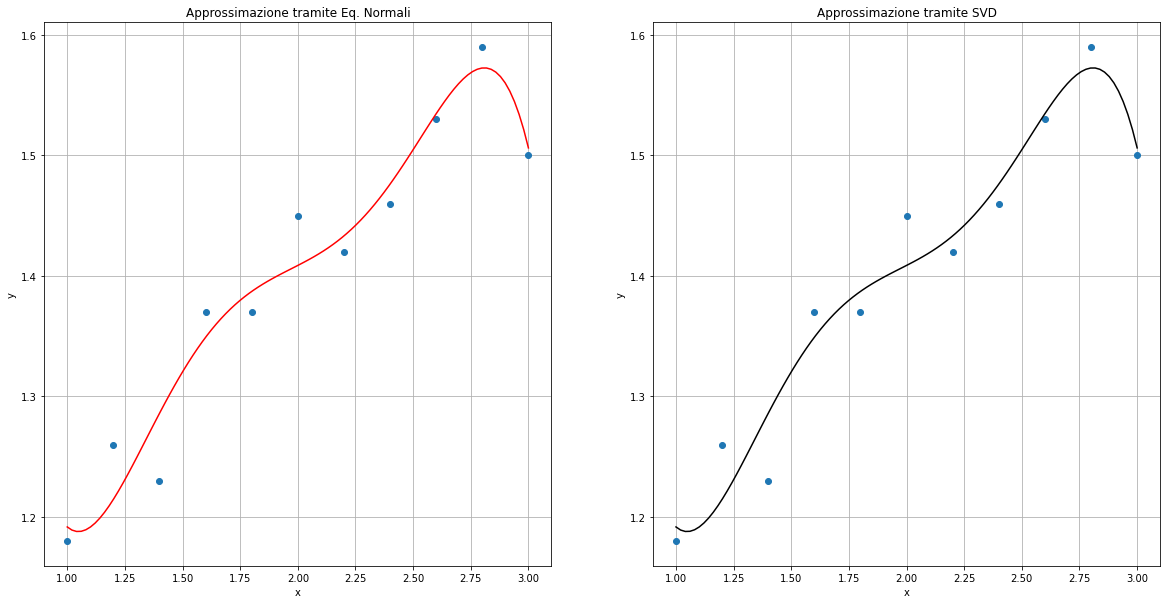

In [16]:
'''CONFRONTO GRAFICO '''

x_plot = np.linspace(1, 3, 100)

y_normali = p(alpha_normali, x_plot)
y_svd = p(alpha_svd, x_plot)


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(x, y, 'o')
plt.plot(x_plot, y_normali, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approssimazione tramite Eq. Normali')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, y, 'o')
plt.plot(x_plot, y_svd, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approssimazione tramite SVD')
plt.grid()

plt.show()